In [11]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

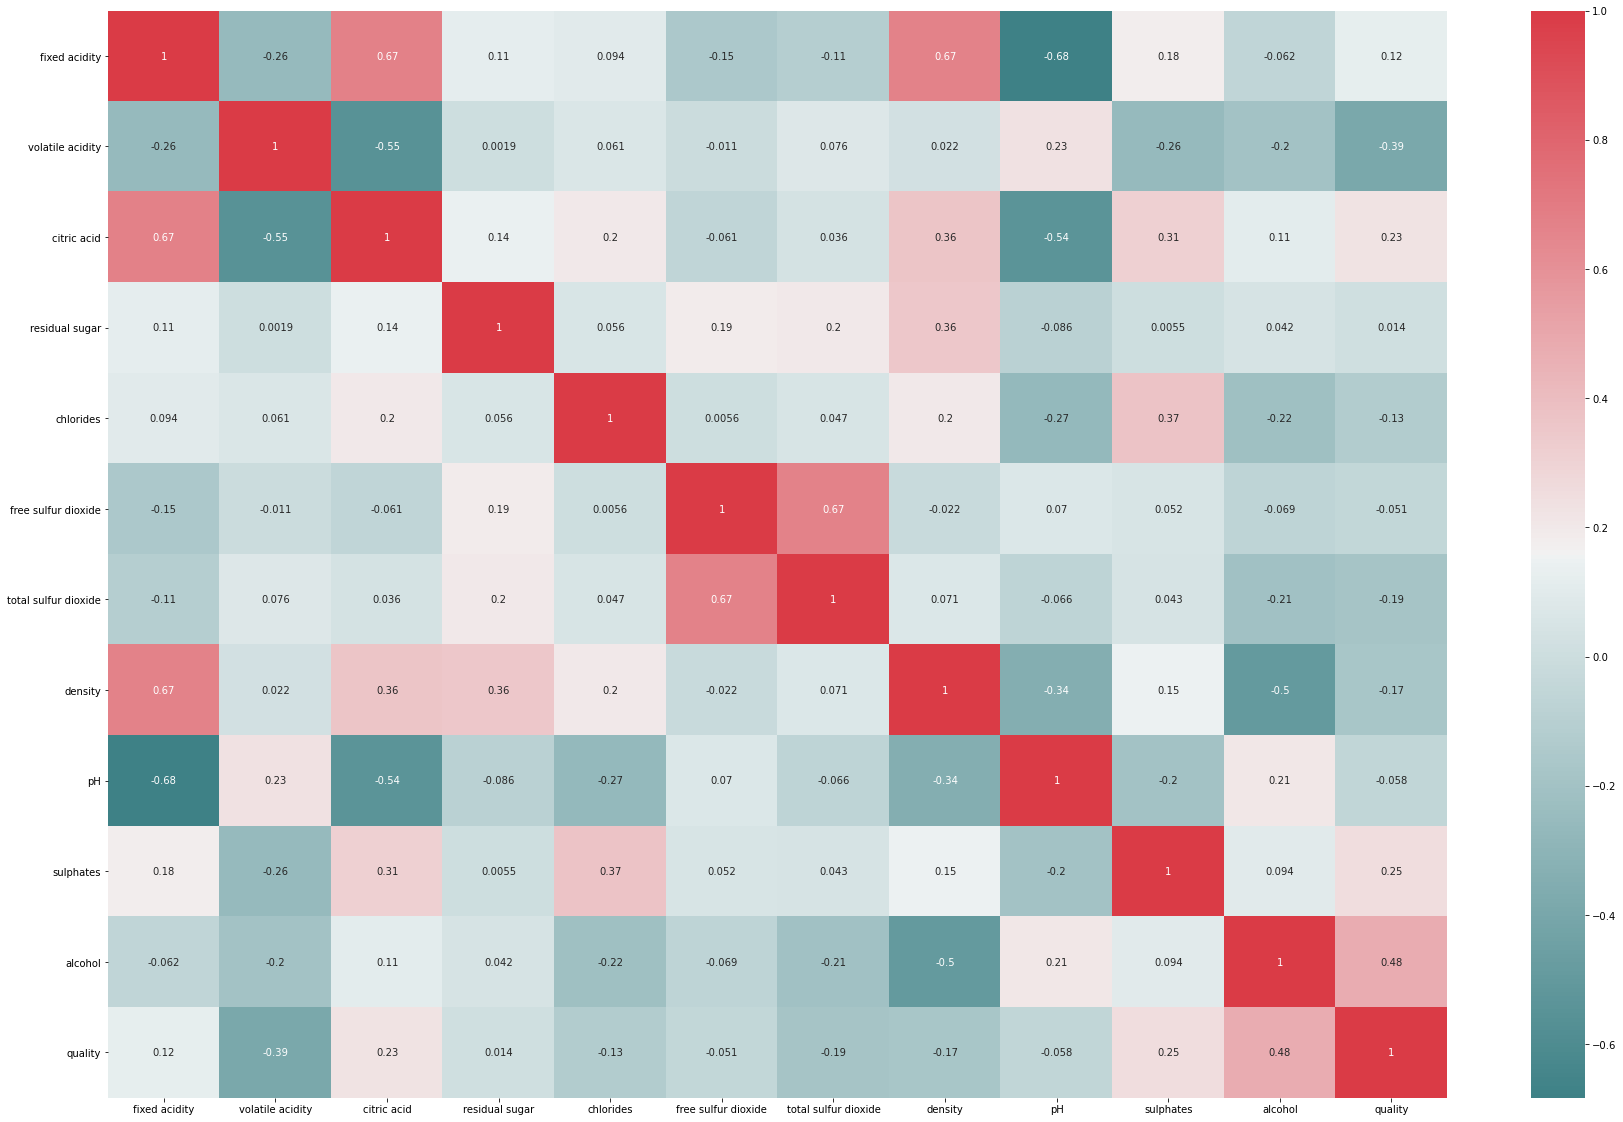

In [12]:
plt.figure(figsize=(30,20))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()

No handles with labels found to put in legend.


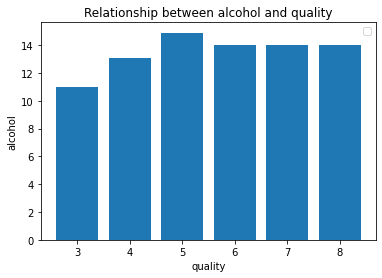

In [14]:
plt.bar(df['quality'], df['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_df = scaler.fit_transform(df)
normal_df = pd.DataFrame(normal_df, columns = df.columns)
print(normal_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

In [16]:
df["good wine"] = ["yes" if i >= 7 else "no" for i in df['quality']]

In [17]:
X = normal_df.drop(["quality"], axis = 1)
y = df["good wine"]

In [18]:
y.value_counts()

no     1382
yes     217
Name: good wine, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


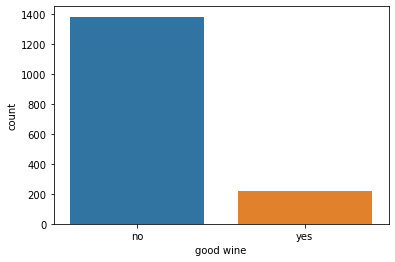

In [19]:
sns.countplot(y)
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)


In [21]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2020)
dummy_classifier.fit(X_train,y_train)
acc_baseline = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", acc_baseline)

Baseline Accuracy =  0.8645833333333334


In [22]:
#model 1 - decision tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2022)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [29]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

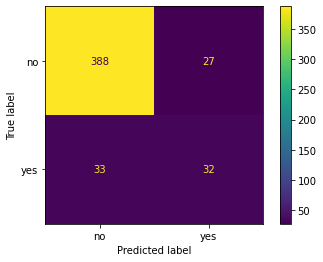

0.875


In [31]:
y_pred = dt.predict(X_test)
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()
print(metrics.accuracy_score(y_test, y_pred))

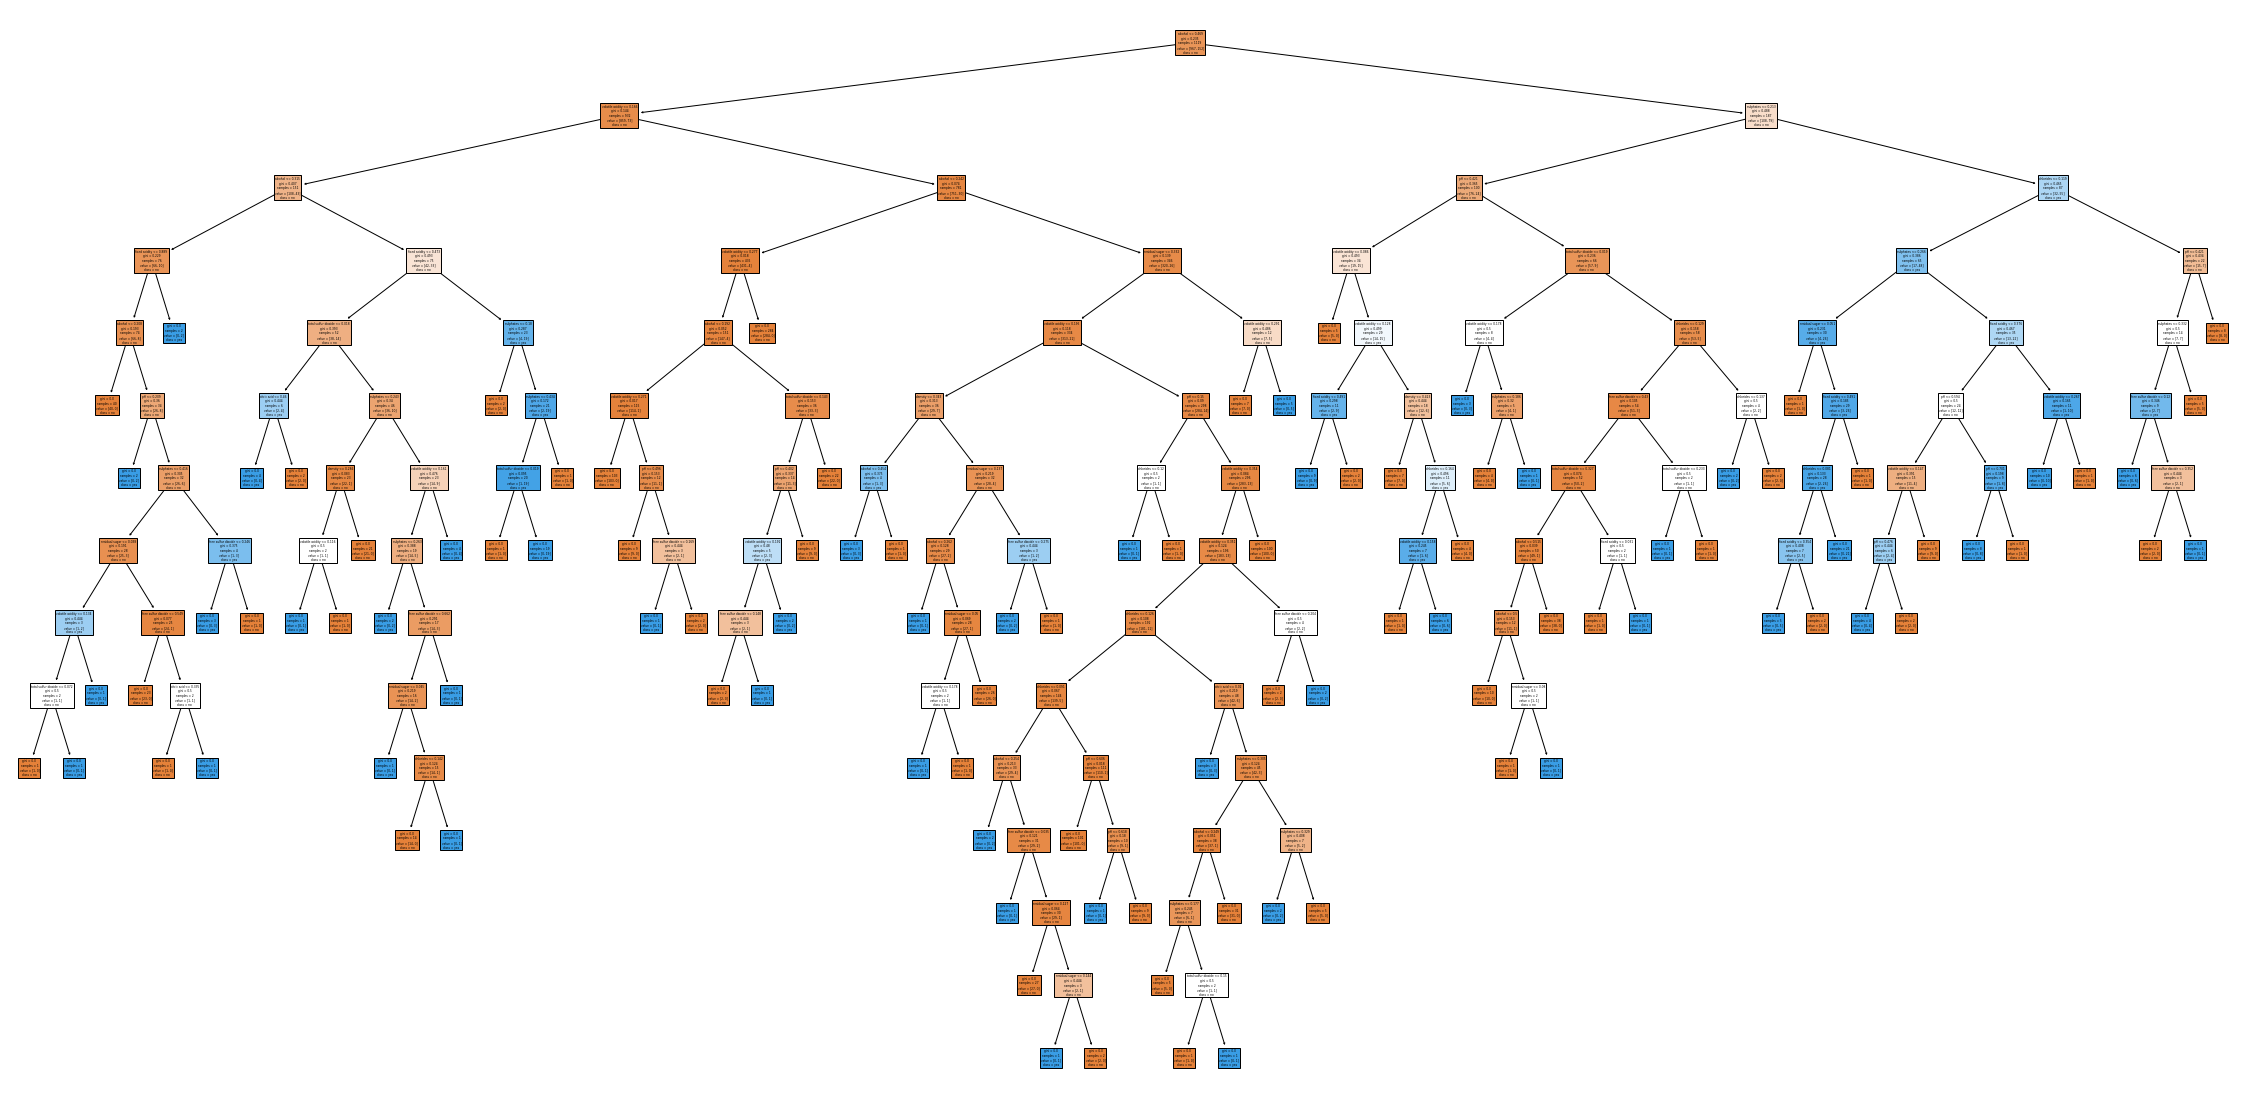

In [32]:
from sklearn import tree
plt.figure(figsize=(40,20))
fn = X.columns
cn = y.unique()
tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8048844043887149


In [35]:
y_pred_train = dt.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
param_dist = {"max_depth": range(1,6),
              "max_features": range(1,10),
              "criterion": ["gini", "entropy"]}
dt_cv = GridSearchCV(dt, param_dist, cv=5)
dt_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 6),
                         'max_features': range(1, 10)})

In [39]:
dt_new = DecisionTreeClassifier(criterion = "gini",
                                max_depth = 2,
                                max_features = 8,
                                random_state = 2020)
dt_new.fit(X_train, y_train)
y_pred_new = dt_new.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_new))
scores = cross_val_score(dt_new, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

0.8854166666666666
Cross Validation Score:  0.8786794670846394


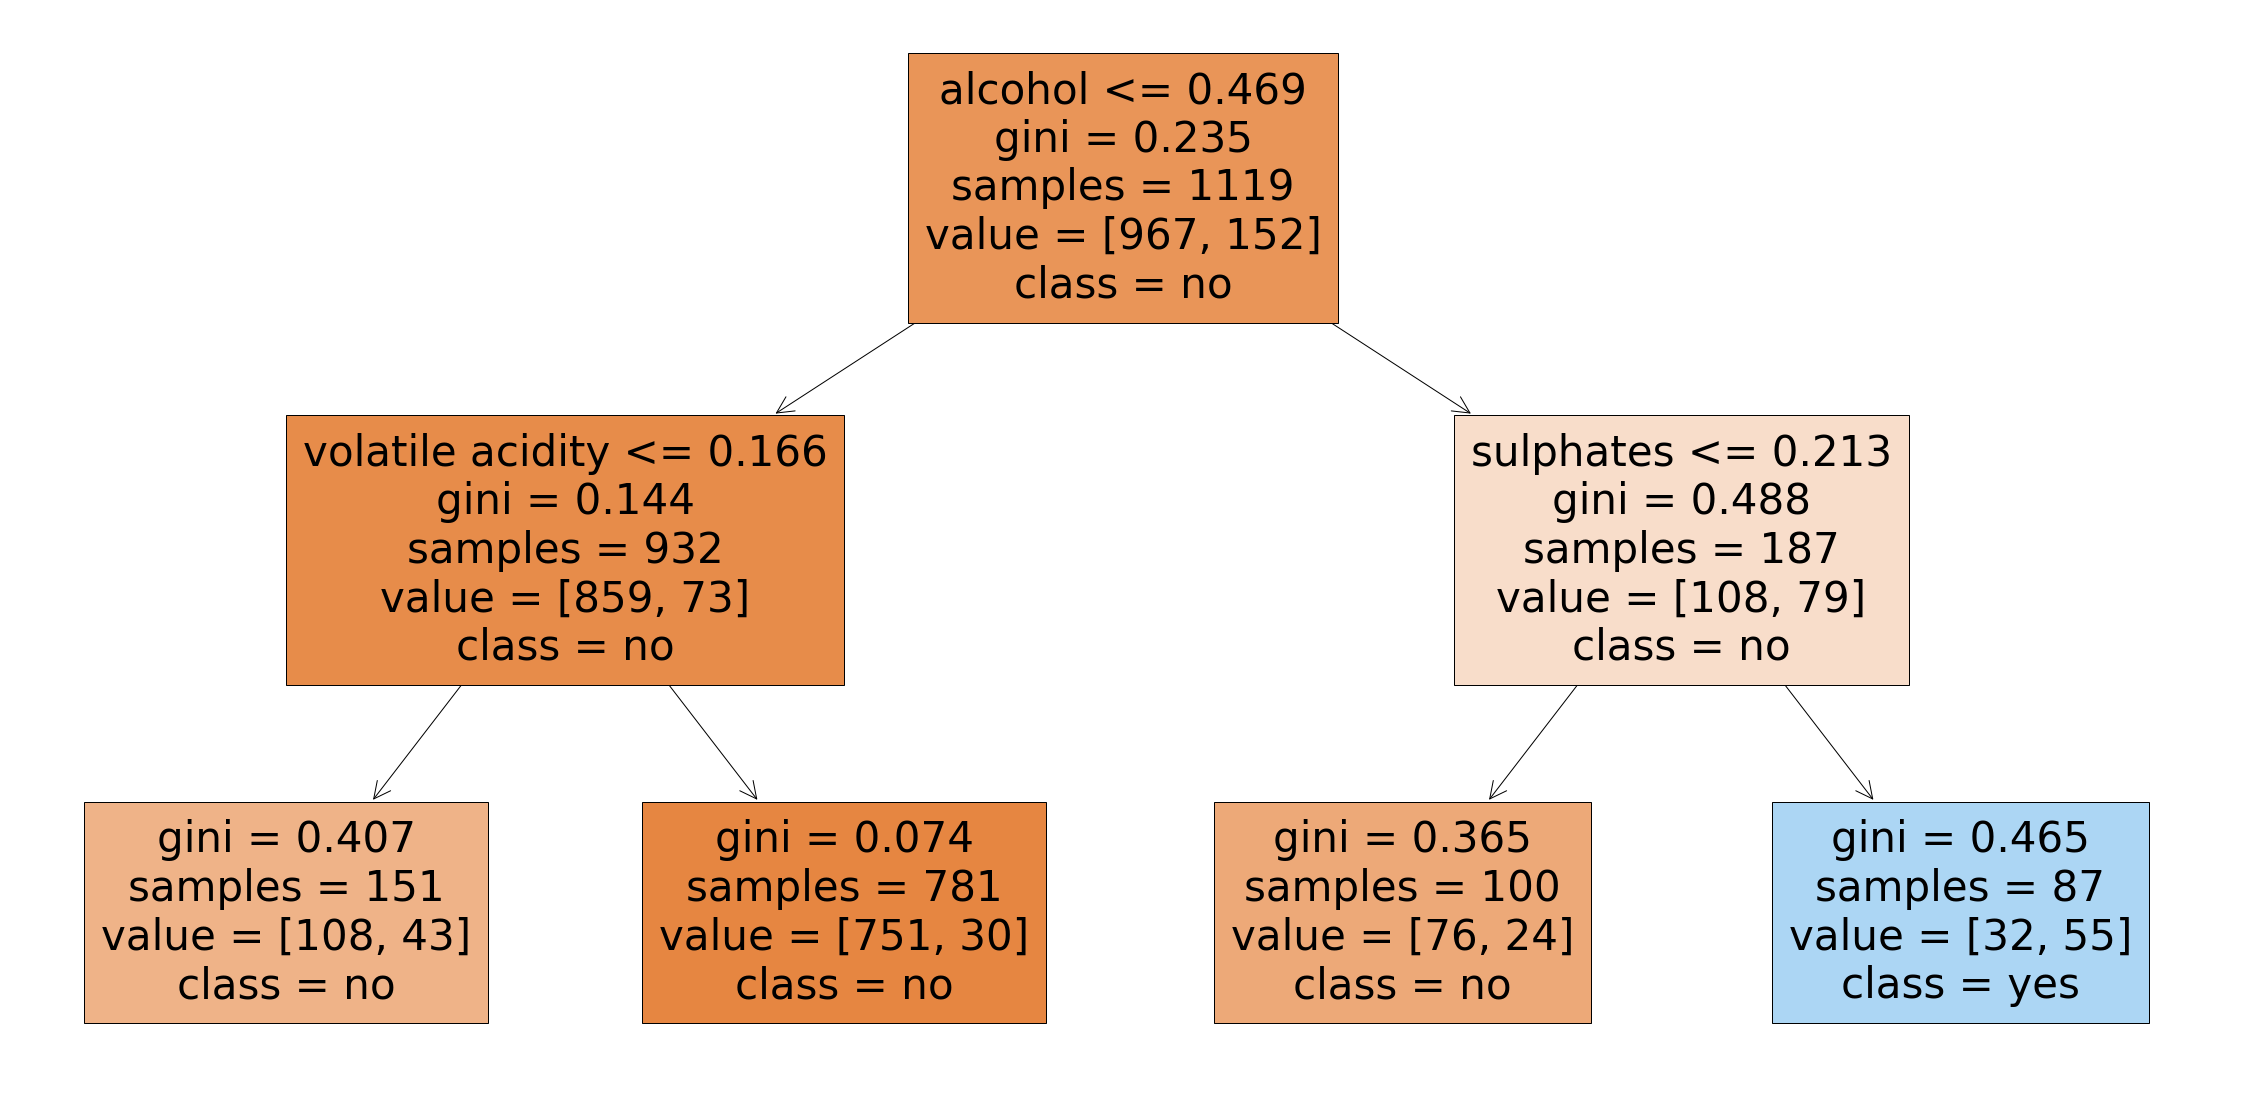

In [40]:
plt.figure(figsize=(40,20))
tree.plot_tree(dt_new, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [41]:
#model 2-random forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 2020)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=2020)

In [43]:
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)

Accuracy =  0.9166666666666666


In [44]:
scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8680466300940439


In [45]:
y_pred_train = rf_model.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [46]:
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2020, 'verbose': 0, 'warm_start': False}


In [50]:
random_grid = {'max_depth': [1, 5, 10, 15],
'n_estimators': [100,200,300,400,500,600]}
rf_random = RandomizedSearchCV(rf_model,random_grid, n_iter = 50, cv = 5,random_state = 2020)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 300, 'max_depth': 10}


In [51]:
param_dist = {"max_depth":[7,8,9,10,11,12,13,14,15],      "n_estimators":[280,300,320,350,380,400,420,450,480]}
rf_cv = GridSearchCV(rf_model, param_dist, cv=5)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_params_)

{'max_depth': 14, 'n_estimators': 450}


In [52]:
rf_new = RandomForestClassifier(n_estimators = 450, max_depth =  14, random_state = 2020)
rf_new.fit(X_train,y_train)
y_pred_rf = rf_new.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)
scores = cross_val_score(rf_new, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Accuracy =  0.9166666666666666
Cross Validation Score:  0.868669670846395


In [53]:
#conclusion
The final accuracy on testing dataset of the decision tree model is 0.885.
The final accuracy on testing dataset of the random forest model is 0.917.
Since the random forest model has the highest accuracy, I choose the random forest model as our final model to use.

SyntaxError: invalid syntax (<ipython-input-53-e2feed9428ff>, line 2)

In [55]:
imp_rf = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),columns = ["feature", "importance"])
imp_rf.set_index("feature", inplace=True)
imp_rf.sort_values(by = "importance", ascending = False, inplace = True)
imp_rf.head()

,importance
feature,
alcohol,0.162224
volatile acidity,0.130491
sulphates,0.112694
density,0.096320
citric acid,0.093280


In [56]:
#the top 3 important properties are alcohol, volatile acidity, and sulphates.

In [57]:
print(np.average(df[df["good wine"] == "yes"].alcohol))
print(np.average(df[df["good wine"] == "no"].alcohol))

11.518049155145931
10.251037144235408


In [58]:
print(np.average(df[df["good wine"] == "yes"].sulphates))
print(np.average(df[df["good wine"] == "no"].sulphates))

0.7434562211981566
0.6447539797395079


In [59]:
df_good = df[df["good wine"] == "yes"]
df_bad = df[df["good wine"] == "no"]
print(np.average(df_good["volatile acidity"]))
print(np.average(df_bad["volatile acidity"]))

0.4055299539170507
0.5470224312590448


In [ ]:
In conclusion, alcohol, volatile acidity, and sulphates are the top 3 important properties that can make a wine good. Good quality wines have higher levels of alcohol on average, lower levels of volatile acidity on average, and higher levels of sulphates on average.
